In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/wines.csv')
y = df['Class']
y_cat = pd.get_dummies(y)
X = df.drop('Class', axis=1)
X.shape

(178, 13)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsc = sc.fit_transform(X)

C:\Users\oprea\Anaconda3\envs\ztdl\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\oprea\Anaconda3\envs\ztdl\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

Using TensorFlow backend.


In [6]:
from keras.layers import Input
from keras.models import Model

In [7]:
K.clear_session()

inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
178/178 [==============================] - 1s 4ms/step - loss: 0.7083 - acc: 0.7416
Epoch 2/20
178/178 [==============================] - 0s 157us/step - loss: 0.2725 - acc: 0.9551
Epoch 3/20
178/178 [==============================] - 0s 157us/step - loss: 0.1536 - acc: 0.9775
Epoch 4/20
178/178 [==============================] - 0s 149us/step - loss: 0.1178 - acc: 0.9831
Epoch 5/20
178/178 [==============================] - 0s 164us/step - loss: 0.1164 - acc: 0.9775
Epoch 6/20
178/178 [==============================] - 0s 164us/step - loss: 0.0816 - acc: 0.9831
Epoch 7/20
178/178 [==============================] - 0s 180us/step - loss: 0.0674 - acc: 0.9888
Epoch 8/20
178/178 [==============================] - 0s 157us/step - loss: 0.0488 - acc: 0.9888
Epoch 9/20
178/178 [==============================] - 0s 135us/step - loss: 0.0133 - acc: 1.0000
Epoch 10/20
178/178 [==============================] - 0s 139us/step - loss: 0.0638 - acc: 0.9831
Epoch 11/20
178/178 [==========

In [8]:
features_function = K.function([inputs], [second_to_last])

In [9]:
features = features_function([Xsc])[0]

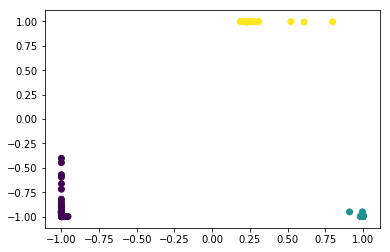

In [10]:
plt.scatter(features[:, 0], features[:, 1], c=y)

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [20]:
checkpointer = ModelCheckpoint(filepath="/tmp/udemy/weights.hdf5",
                               verbose=1, save_best_only=True)

In [21]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0,
                             patience=1, verbose=1, mode='auto')

In [22]:
tensorboard = TensorBoard(log_dir='/tmp/udemy/tensorboard/')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Xsc, y_cat.values,
                                                    test_size=0.3,
                                                    random_state=42)

In [25]:
K.clear_session()

inputs = Input(shape=(13,))

x = Dense(8, kernel_initializer='he_normal', activation='tanh')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='tanh')(x)
second_to_last = Dense(2, kernel_initializer='he_normal',
                       activation='tanh')(x)
outputs = Dense(3, activation='softmax')(second_to_last)

model = Model(inputs=inputs, outputs=outputs)

model.compile(RMSprop(lr=0.05), 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,
          epochs=20, verbose=2,
          validation_data=(X_test, y_test),
          callbacks=[checkpointer, earlystopper, tensorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/20
 - 1s - loss: 0.9068 - acc: 0.5484 - val_loss: 0.5519 - val_acc: 0.9074

Epoch 00001: val_loss improved from inf to 0.55189, saving model to /tmp/udemy/weights.hdf5
Epoch 2/20
 - 0s - loss: 0.4949 - acc: 0.9113 - val_loss: 0.3077 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.55189 to 0.30768, saving model to /tmp/udemy/weights.hdf5
Epoch 3/20
 - 0s - loss: 0.2746 - acc: 0.9839 - val_loss: 0.2431 - val_acc: 0.9815

Epoch 00003: val_loss improved from 0.30768 to 0.24312, saving model to /tmp/udemy/weights.hdf5
Epoch 4/20
 - 0s - loss: 0.1856 - acc: 0.9919 - val_loss: 0.1688 - val_acc: 0.9815

Epoch 00004: val_loss improved from 0.24312 to 0.16881, saving model to /tmp/udemy/weights.hdf5
Epoch 5/20
 - 0s - loss: 0.1203 - acc: 1.0000 - val_loss: 0.1232 - val_acc: 0.9815

Epoch 00005: val_loss improved from 0.16881 to 0.12320, saving model to /tmp/udemy/weights.hdf5
Epoch 6/20
 - 0s - loss: 0.0894 - acc: 1.0000 - val_loss: 0

In [28]:
import os
print(os.getcwd())

C:\Users\oprea\projects\zero_to_deep_learning_video\exercises


Start anaconda powershell and activate ztdl
Run Tensorboard with the command:

tensorboard --logdir /tmp/udemy/tensorboard/
and open your browser at http://localhost:6006